# CS4186 Assignment 1: Histogram Model

Importing All Libraries

In [1]:
import os
from cv2 import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from utils import query_crop, retrival_idx, visualization_hist as visualization, similarity_pearson, similarity_distance

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.autolayout"] = True

Parameters

In [3]:
generate_cropped_images = True
generate_query_hist = False
generate_gallery_hist = False
similarity = 'cosine'

## Helper Functions

In [4]:
def create_hist(image):
    bins = 16
    img = image.reshape(-1, 3)
    size = int(256/bins)
    
    B = [0]*bins
    G = [0]*bins
    R = [0]*bins
        
    for pixel in img:
        b = int(pixel[0]/size)
        g = int(pixel[1]/size)
        r = int(pixel[2]/size)
        if b > bins - 1:
            b = bins - 1
        if g > bins - 1:
            g = bins - 1
        if r > bins - 1:
            r = bins - 1
        B[b] += 1
        G[g] += 1
        R[r] += 1
    
    histogram = np.array([B, G, R])
    return histogram

def extract_crop_images():
    query_dir = './datasets_4186/query_4186/'
    txt_dir = './datasets_4186/query_txt_4186/'
    save_dir =  './datasets_4186/query_cropped/'

    for query_file in tqdm(os.listdir(query_dir)):
        if query_file.endswith(".DS_Store"):
            continue
        
        img_name = query_file[0:query_file.find('.')]
        txt_file = img_name+'.txt'

        query_path = os.path.join(query_dir, query_file)
        txt_path = os.path.join(txt_dir, txt_file)
        save_path = os.path.join(save_dir, query_file)

        crop = query_crop(query_path, txt_path, save_path)
        # crop_resize = cv2.resize(crop, (224, 224), interpolation=cv2.INTER_CUBIC)

def extract_color_histogram(gallery_dir, save_dir, is_gallery_file=False):
    count = 0
    for query_file in tqdm(os.listdir(gallery_dir)):

        img_name = query_file[0:query_file.find('.')]
        
        img_file = img_name+'.jpg'
        featsave_file = img_name+'_feats_hist.npy'

        print(img_name, img_file, featsave_file)

        img_path = os.path.join(gallery_dir,img_file)
        feat_path = os.path.join(save_dir,featsave_file)
        
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_CUBIC)
        hist = create_hist(img)
        np.save(feat_path, hist, allow_pickle=True)
        count+=1
        if is_gallery_file == True:
            if count > 10:
                break

def cos_similarity(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def compareHistogram(h1, h2, similarity='cosine'):
    if similarity == 'cosine':
        score_b = cos_similarity(h1[0], h2[0])
        score_g = cos_similarity(h1[1], h2[1])
        score_r = cos_similarity(h1[2], h2[2])
    elif similarity == 'pearson':
        score_b = similarity_pearson(h1[0], h2[0])
        score_g = similarity_pearson(h1[1], h2[1])
        score_r = similarity_pearson(h1[2], h2[2])
    elif similarity == 'euclidean':
        score_b = similarity_distance(h1[0], h2[0])
        score_g = similarity_distance(h1[1], h2[1])
        score_r = similarity_distance(h1[2], h2[2])
    
    return (score_b+score_g+score_r)/3

def retrival_idx(query_path, gallery_dir, similarityType = 'cosine'):
    query_feat = np.load(query_path, allow_pickle=True)
    # print(query_feat)
    
    dict_values = {}
    # print(dict_values)
    
    for gallery_file in os.listdir(gallery_dir):
        gallery_feat = np.load(os.path.join(gallery_dir, gallery_file),  allow_pickle=True)
        gallery_idx = gallery_file.split('.')[0] + '.jpg'

        
        sim = compareHistogram(query_feat, gallery_feat, similarityType)
        # print(sim)
        dict_values[gallery_idx] = sim
    sorted_dict = sorted(dict_values.items(), key=lambda item: item[1]) # Sort the similarity score
    if similarityType == 'euclidean':
        best_ten = sorted_dict[:10]
    else:
        best_ten = sorted_dict[-10:] # Get the best five retrived images
    # print(best_ten)
    return best_ten



## Main Function

Responsible for Extracting Features

In [5]:
query_dir = './datasets_4186/query_cropped/'
query_hist = './datasets_4186/query_cropped_hist/'

gallery_dir = './datasets_4186/gallery_4186/'
gallery_hist = './datasets_4186/gallery_feature_hist/'

if generate_cropped_images == True:
    extract_crop_images()

if generate_query_hist == True:
    if os.path.isdir(query_hist)==False:
        os.mkdir(query_hist)
    extract_color_histogram(query_dir,query_hist,is_gallery_file=False)

if generate_gallery_hist == True:
    if os.path.isdir(gallery_hist)==False:
        os.mkdir(gallery_hist)
    extract_color_histogram(gallery_dir,gallery_hist,is_gallery_file=False)

100%|██████████| 20/20 [00:00<00:00, 68.65it/s]


Retrieving Features

3141 0.964099012615097 1258.jpg
1210 0.9494887570270585 1258.jpg
775 0.9451659585677606 1258.jpg
4893 0.9451185453826133 1258.jpg
4992 0.9443920404488542 1258.jpg
3 0.9428980435488689 1258.jpg
4223 0.9414188175462362 1258.jpg
4845 0.935080486976459 1258.jpg
766 0.9349198682862706 1258.jpg
2894 0.9327438939670866 1258.jpg


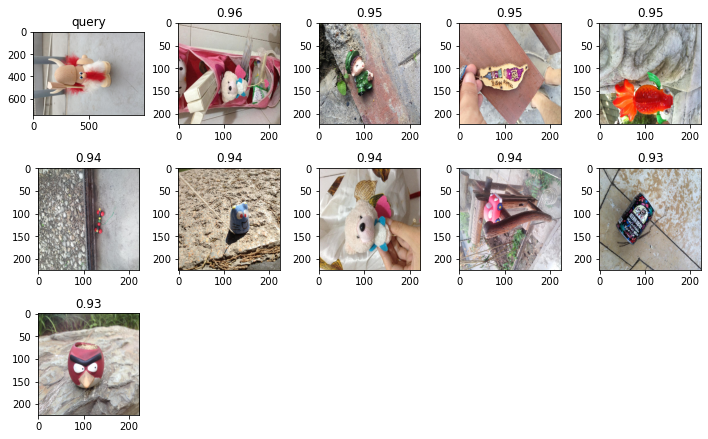

1871 0.9662619672150977 1656.jpg
2533 0.9600259775002128 1656.jpg
2781 0.9589445429076645 1656.jpg
4461 0.9580867078414133 1656.jpg
3884 0.9574495035616701 1656.jpg
4393 0.9531624107416777 1656.jpg
2490 0.9523845871434871 1656.jpg
2468 0.950885506644152 1656.jpg
4353 0.9506479789122769 1656.jpg
1759 0.9501656217388947 1656.jpg


291 0.941984893932923 1709.jpg
4214 0.8918628829610781 1709.jpg
376 0.8270017502126327 1709.jpg
2215 0.7707810326501555 1709.jpg
3857 0.7696294186703002 1709.jpg
3154 0.7637234799293776 1709.jpg
3627 0.7632304630025178 1709.jpg
4009 0.7460570494880064 1709.jpg
3926 0.7377204693167476 1709.jpg
2661 0.7293045873142042 1709.jpg


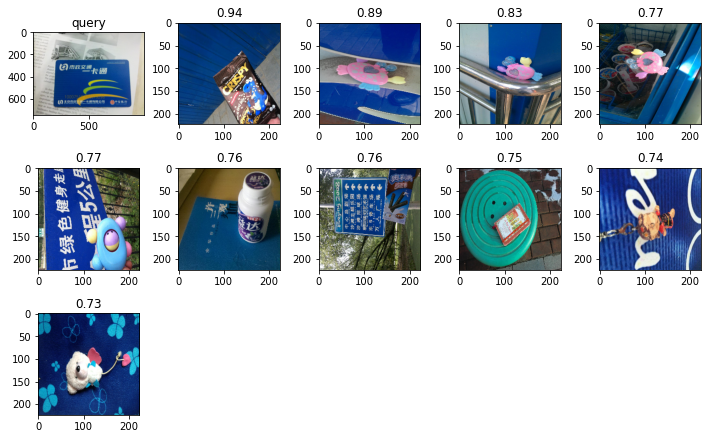

2285 0.8824719142071329 2032.jpg
892 0.8378243818442651 2032.jpg
770 0.825569617951265 2032.jpg
4148 0.8148229014448534 2032.jpg
4850 0.8122174722626193 2032.jpg
3398 0.8076387296458131 2032.jpg
1946 0.8065069053021151 2032.jpg
3335 0.8039313358891992 2032.jpg
297 0.8019658480850119 2032.jpg
1889 0.801811190590759 2032.jpg


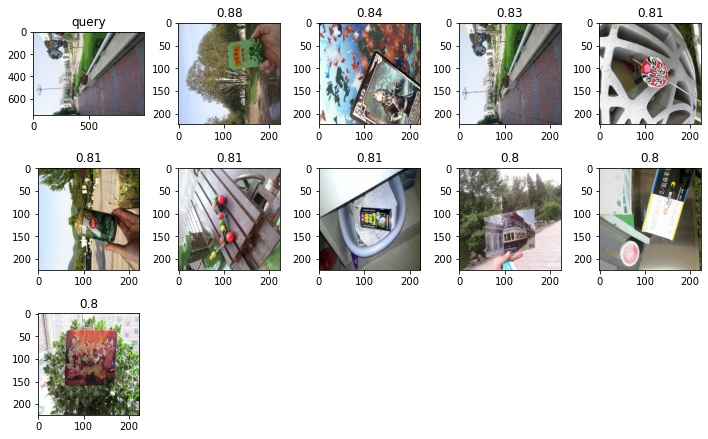

2850 0.917986037211128 2040.jpg
3156 0.9061303498825747 2040.jpg
248 0.9029157067207577 2040.jpg
1621 0.9013288661806969 2040.jpg
1657 0.8993395720416387 2040.jpg
1474 0.8880963270287924 2040.jpg
4280 0.8857837024964289 2040.jpg
2666 0.884535918418493 2040.jpg
3219 0.8830227486241095 2040.jpg
1818 0.8767230464875378 2040.jpg


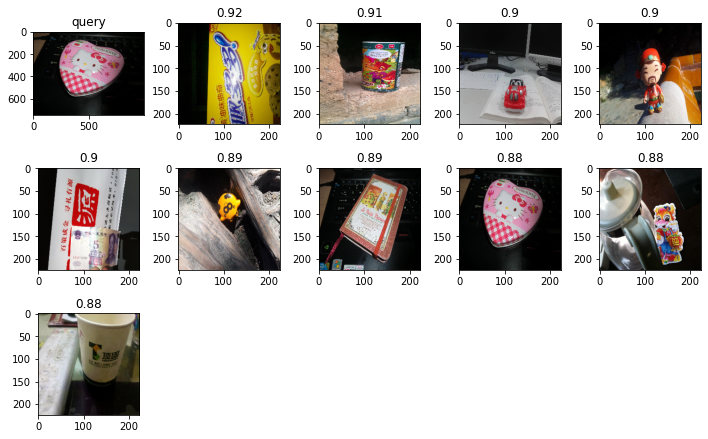

1031 0.9672931738970303 2176.jpg
3379 0.963364436514753 2176.jpg
3889 0.9574765297653564 2176.jpg
4590 0.9465930457139552 2176.jpg
421 0.9360728436636186 2176.jpg
4583 0.9301338719011643 2176.jpg
4029 0.9290335797941175 2176.jpg
4218 0.9287073838051811 2176.jpg
4462 0.9263242470087713 2176.jpg
1872 0.9255586129484313 2176.jpg


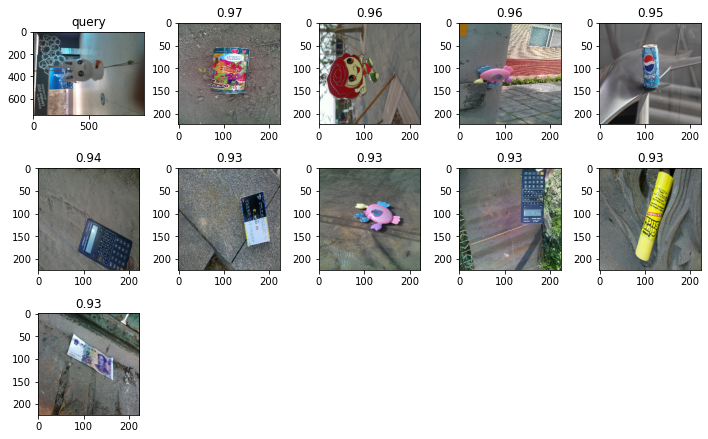

3259 0.9710144024119064 2461.jpg
2272 0.9608985801470116 2461.jpg
819 0.9604757067264843 2461.jpg
2503 0.9579136972618448 2461.jpg
1547 0.9559325189948459 2461.jpg
4996 0.9501394325587165 2461.jpg
1470 0.949842781927304 2461.jpg
3161 0.942228840532341 2461.jpg
3065 0.9375953893838594 2461.jpg
484 0.931975822738582 2461.jpg


949 0.925239052359364 2714.jpg
2089 0.9249965995303705 2714.jpg
4749 0.9206878606316954 2714.jpg
4527 0.9191081086466156 2714.jpg
3503 0.9159345919050633 2714.jpg
591 0.9154710400541056 2714.jpg
2653 0.9127971059407461 2714.jpg
4623 0.9110540264857151 2714.jpg
3211 0.9110192794406702 2714.jpg
2419 0.9109538565981267 2714.jpg


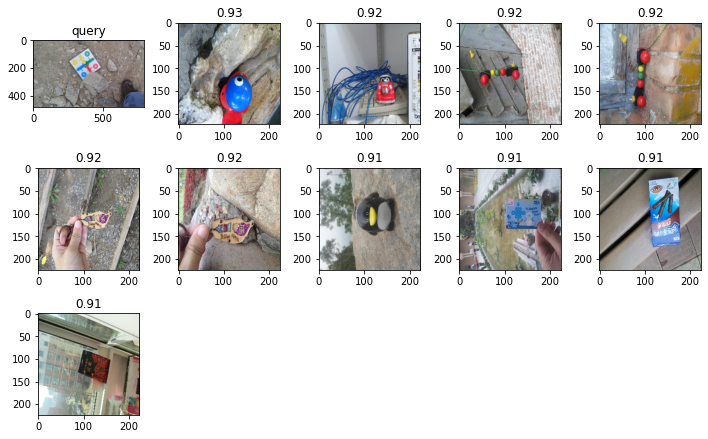

3219 0.9427322817349072 27.jpg
1409 0.9374253712833398 27.jpg
1474 0.9308656246144847 27.jpg
1186 0.9308416068229007 27.jpg
219 0.9286185069137393 27.jpg
2022 0.9275177338640312 27.jpg
792 0.9250967196479415 27.jpg
1004 0.924532248630041 27.jpg
4262 0.9208389431308183 27.jpg
2458 0.9177956515804664 27.jpg


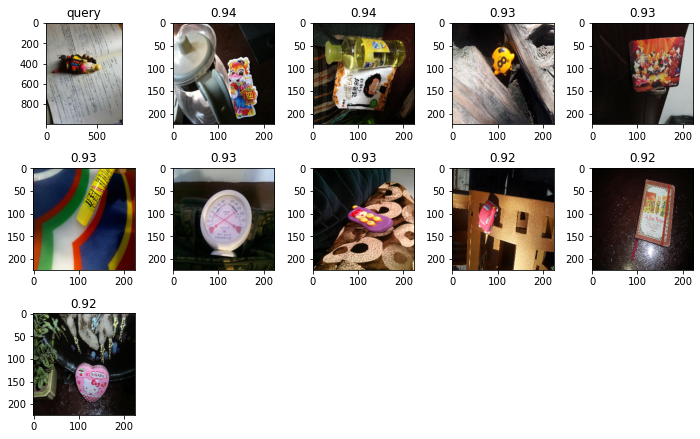

3860 0.9031666228567309 316.jpg
3550 0.8798420797025823 316.jpg
3231 0.8712623195362786 316.jpg
2183 0.8657351314968585 316.jpg
4300 0.8612957897857502 316.jpg
4686 0.8612692948390737 316.jpg
3447 0.8592962506890944 316.jpg
3183 0.8529841459224937 316.jpg
117 0.8529292775479872 316.jpg
1817 0.8503809031573839 316.jpg


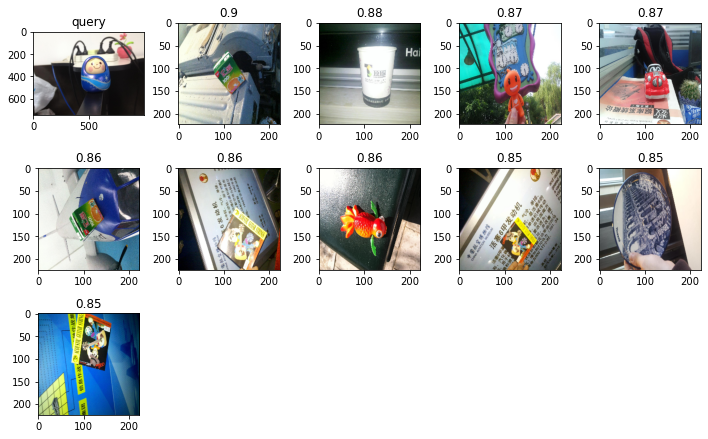

416 0.9137784448199372 3502.jpg
1518 0.90469351863206 3502.jpg
4991 0.9023267132984619 3502.jpg
2254 0.901828514515648 3502.jpg
579 0.8995639186180885 3502.jpg
164 0.8985742426676864 3502.jpg
2976 0.8965427492144046 3502.jpg
1226 0.8932906129828885 3502.jpg
4313 0.8925500686082426 3502.jpg
1756 0.8892600105616456 3502.jpg


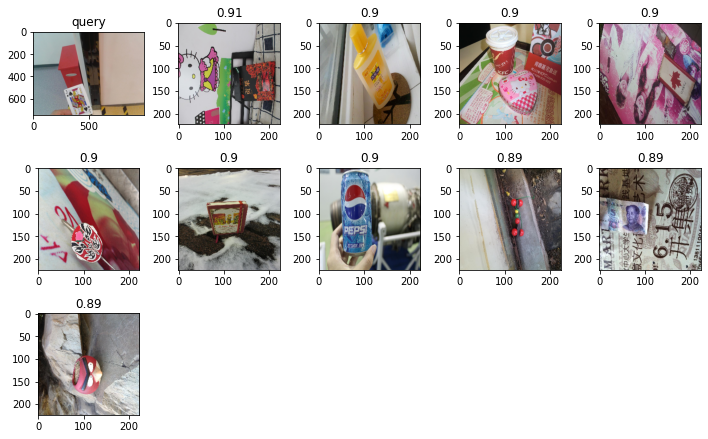

3543 0.9582040024509605 3557.jpg
722 0.9524605551087802 3557.jpg
573 0.9519985928955103 3557.jpg
3485 0.94718334760822 3557.jpg
1353 0.9455482050129075 3557.jpg
1026 0.9438257363629208 3557.jpg
3151 0.9421467435614383 3557.jpg
3578 0.9416546106234001 3557.jpg
4046 0.9415468119978665 3557.jpg
3762 0.9407231122697904 3557.jpg


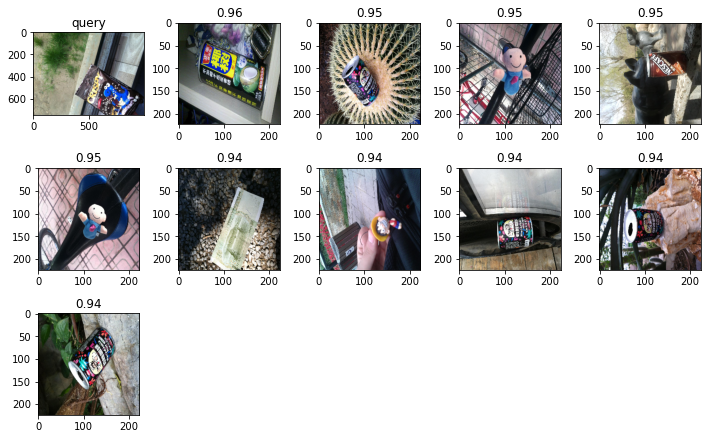

653 0.9418277579686816 35.jpg
2098 0.9403753954185597 35.jpg
2593 0.9379906465132036 35.jpg
3676 0.9306936602239815 35.jpg
752 0.9207902382718337 35.jpg
1625 0.9200271872496675 35.jpg
97 0.9095631586911915 35.jpg
1291 0.9082477869703419 35.jpg
4140 0.9034056787436588 35.jpg
949 0.9010643197194687 35.jpg


1682 0.9120657521844192 3833.jpg
1038 0.9109546091701916 3833.jpg
2033 0.8837549005253574 3833.jpg
2194 0.8273352687793443 3833.jpg
1919 0.8248720076530253 3833.jpg
1095 0.782817594925688 3833.jpg
3514 0.77936042202148 3833.jpg
4700 0.7778381059013583 3833.jpg
1486 0.7600436377643635 3833.jpg
3008 0.7571714025796946 3833.jpg


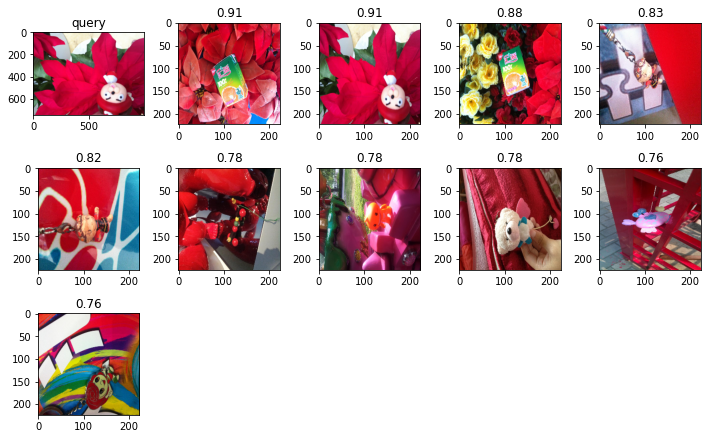

2669 0.9394722679453148 3906.jpg
1662 0.938438828192303 3906.jpg
4679 0.9355395059981362 3906.jpg
854 0.9344203373902236 3906.jpg
2369 0.9338460514678227 3906.jpg
3332 0.9330957723855272 3906.jpg
822 0.9324988438161942 3906.jpg
2023 0.9321329202292526 3906.jpg
1515 0.9311297461931671 3906.jpg
1221 0.9307200752172652 3906.jpg


2 0.8536928127746286 4354.jpg
1987 0.7933201100894994 4354.jpg
3622 0.7837821858175706 4354.jpg
1412 0.7662776283720406 4354.jpg
2168 0.7640555326868498 4354.jpg
4835 0.759152488845555 4354.jpg
4399 0.7565283316001921 4354.jpg
1331 0.7452797243539319 4354.jpg
4403 0.7275932955807419 4354.jpg
4886 0.7246265172299861 4354.jpg


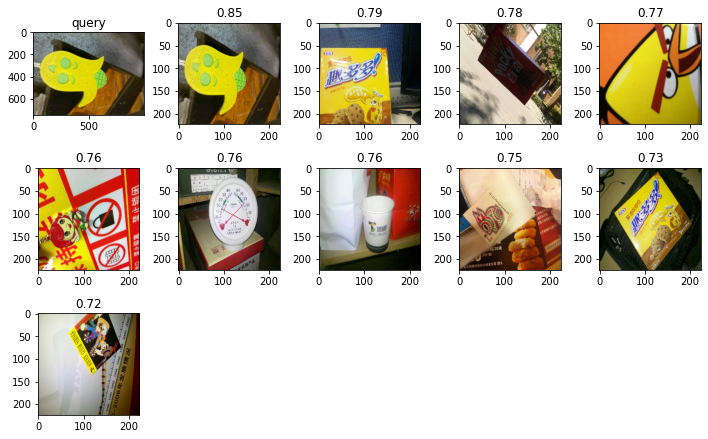

1419 0.9315147153343301 4445.jpg
2982 0.8590803847899423 4445.jpg
2134 0.8590760315170716 4445.jpg
3084 0.8577891214017151 4445.jpg
2224 0.8569688689636639 4445.jpg
4992 0.8563434997354115 4445.jpg
166 0.853932031417131 4445.jpg
3800 0.8536839785465986 4445.jpg
2058 0.8527134777840472 4445.jpg
2006 0.8525249012326473 4445.jpg


3168 0.8803562075356176 4716.jpg
4040 0.8768581224296051 4716.jpg
1180 0.86596067974662 4716.jpg
1517 0.8658279479896741 4716.jpg
1363 0.8633964743423267 4716.jpg
1881 0.8619008972259753 4716.jpg
2498 0.8562453080427996 4716.jpg
4320 0.8545891584338658 4716.jpg
2117 0.8537540007065479 4716.jpg
972 0.8530245140732463 4716.jpg


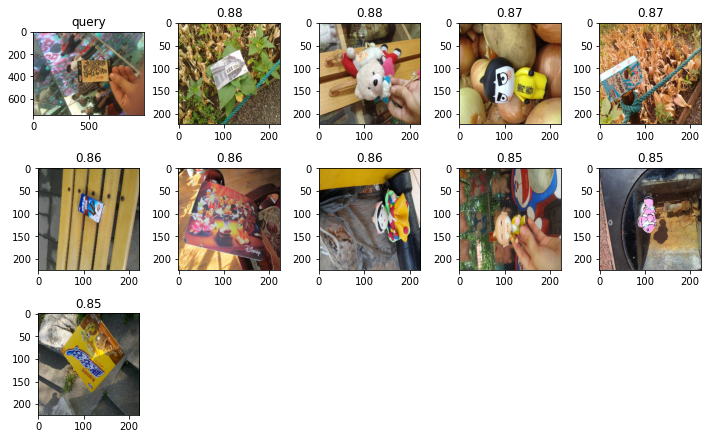

3862 0.8913327837487771 4929.jpg
4695 0.8702216263661207 4929.jpg
3688 0.8607018266000802 4929.jpg
4348 0.8585770686964748 4929.jpg
4441 0.8566518586048782 4929.jpg
2563 0.8556155607237507 4929.jpg
624 0.854788798525925 4929.jpg
611 0.8520445275928914 4929.jpg
4282 0.851202877620406 4929.jpg
694 0.8510155177353281 4929.jpg


1213 0.9478455810314509 776.jpg
3770 0.9469644479367986 776.jpg
272 0.945402974110538 776.jpg
2173 0.9426018624970944 776.jpg
2921 0.9399255925030233 776.jpg
769 0.9371104895855696 776.jpg
2690 0.9354242301603216 776.jpg
233 0.9249691305461344 776.jpg
2315 0.9221492238217035 776.jpg
170 0.9187575046581301 776.jpg


In [6]:
gallery_dir = './datasets_4186/gallery_feature_hist/'
query_dir = './datasets_4186/query_4186/'

count = 1
resultRows = []

for queryf_file in os.listdir(query_hist):
    best_ten = retrival_idx(os.path.join(query_hist, queryf_file), gallery_hist, similarityType = similarity) # retrieve top 10 matching images in the gallery.

    if similarity != 'euclidean':
        best_ten.reverse()
    
    rowString = "Q{}: ".format(count)

    similarImages = []
    for i in best_ten:
        print(i[0][0:i[0].find('_')], i[1], queryf_file[:-15] + '.jpg')
        rowString = rowString + i[0][0:i[0].find('_')] + " "

    # print(rowString)
    resultRows.append(rowString)
    # print(os.path.exists(os.path.join(query_dir, queryf_file[:-15] + '.jpg')))
    visualization(best_ten, os.path.join(query_dir, queryf_file[:-15] + '.jpg')) # Visualize the retrieval results
    count+=1

In [7]:
with open('results/rankList_hist_{}.txt'.format(similarity),'a') as f:
    for row in resultRows:
        f.write('{}\n'.format(row))
    f.close()